# **Unemployment Analysis Project**

# **Importing Required Libraries**





In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **Loading the Dataset**




In [53]:
path = "/content/drive/MyDrive/Dataset/Unemployment_Rate_upto_11_2020.csv"

In [54]:
df = pd.read_csv(path)

## Display basic information about the dataset

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [56]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


## Checking for missing values

In [57]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


# **Data Preprocessing**

## Renaming columns for better clarity

In [58]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'Longitude', 'Latitude']

## Converting 'Date' to datetime format and 'Frequency' and 'Region' to categorical data types

In [59]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

## Extracting the month from 'Date' and mapping it to month names

In [60]:
df['Month_int'] = df['Date'].dt.month
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

## Checking for duplicates

In [61]:
print(f"Any duplicates: {df.duplicated().any()}")

Any duplicates: False


# **Exploratory Data Analysis**

## Correlation Heatmap

In [62]:
corr_matrix = df[['Estimated Unemployment Rate', 'Estimated Employed',
                  'Estimated Labour Participation Rate', 'Longitude', 'Latitude', 'Month_int']].corr()

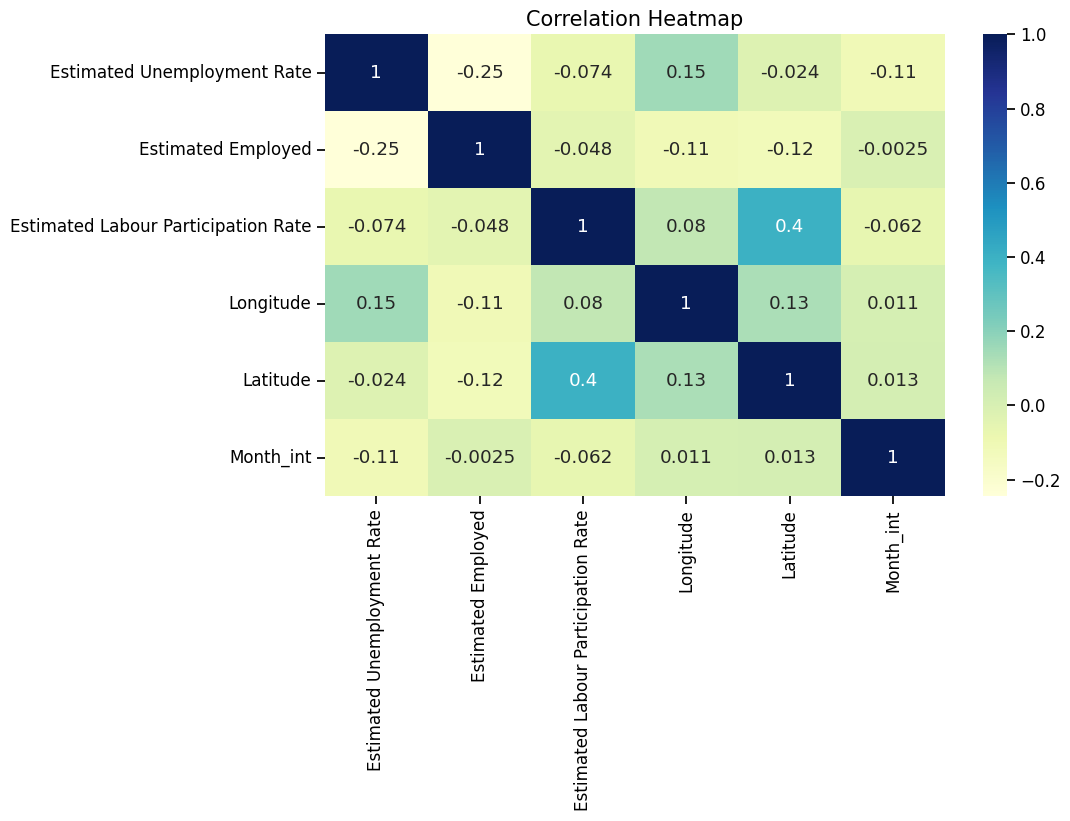

In [63]:
plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1.1)
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap", fontsize=15)
plt.show()

## Unemployment Rate by State (Box Plot)

In [64]:
fig = px.box(df, x='States', y='Estimated Unemployment Rate', color='States',
             title='Unemployment Rate by State', template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


## Scatter Matrix

In [65]:
fig = px.scatter_matrix(df, dimensions=['Estimated Unemployment Rate', 'Estimated Employed',
                                        'Estimated Labour Participation Rate'], color='Region',
                                        title="Scatter Matrix of Key Metrics", template='plotly')
fig.show()

## Bar Plot of Average Unemployment Rate by State

In [66]:
df_unemp = df.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemp, x='States', y='Estimated Unemployment Rate', color='States',
             title='Average Unemployment Rate by State', template='plotly')
fig.show()

## Unemployment Rate Across Regions (with animation over months)

In [67]:
fig = px.bar(df, x='Region', y='Estimated Unemployment Rate', animation_frame='Month_name', color='States',
             title='Unemployment Rate Across Regions (Jan 2020 - Oct 2020)', height=700, template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

## Sunburst Plot: Unemployment Rate in Each Region and State

In [68]:
unemplo_df = df[['States', 'Region', 'Estimated Unemployment Rate']]
unemplo = unemplo_df.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()

fig = px.sunburst(unemplo, path=['Region', 'States'], values='Estimated Unemployment Rate',
                  title='Unemployment Rate in Each Region and State', height=650, template='ggplot2')
fig.show()

## Geographical Scatter Plot: Impact of Lockdown on Employment Across Regions

In [69]:
fig = px.scatter_geo(df,'Longitude', 'Latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

# **Analyzing Unemployment Before and After Lockdown**

In [70]:
lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]
bf_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]

In [71]:
g_lock = lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

In [72]:
g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated Unemployment Rate']
g_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']

## Percentage Change in Unemployment Rate after Lockdown

In [73]:
g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)

## Bar Plot of Percentage Change in Unemployment after Lockdown

In [74]:
plot_per = g_lock.sort_values('percentage change in unemployment')

In [75]:
fig = px.bar(plot_per, x='States',y='percentage change in unemployment',color='percentage change in unemployment',
            title='percentage change in Unemployment in each state after lockdown',template='ggplot2')

fig.show()

## Categorizing Impact Levels

In [76]:
def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 40:
        return 'hardest impacted States'
    return x

In [77]:
plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x:sort_impact(x))

## Bar Plot of Impact Levels across States

In [78]:
fig = px.bar(plot_per, y='States',x='percentage change in unemployment',color='impact status',
            title='Impact of lockdown on employment across states',template='ggplot2',height=650)


fig.show()